In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pycaret as pyc
import numpy as np
import pandas as pd
import mlflow

In [3]:
import pycaret as pyc
from pycaret.regression import *

In [4]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
df = df[['Regional indicator',
                     'Ladder score',
                     'Logged GDP per capita',           
                     'Social support',                
                     'Healthy life expectancy',         
                     'Freedom to make life choices',   
                     'Generosity',                    
                     'Perceptions of corruption']]
df.head()

,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [6]:
#uniqueValues = df['Country name'].nunique()
#print(uniqueValues)

In [7]:
print(df.isnull().sum())
print("Total Missing Values:",df.isnull().sum().sum())

Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Total Missing Values: 0


In [8]:
df.shape

(149, 8)

In [9]:
data = df.sample(frac=0.9, random_state=42)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (134, 8)
Unseen Data For Predictions (15, 8)


In [27]:

regression = setup(data = data, target = 'Ladder score', 
        session_id=123,
        high_cardinality_features = ['Regional indicator'],
        log_experiment = True, 
        silent=True,
        experiment_name = 'regression') 

,Description,Value
0,session_id,123
1,Target,Ladder score
2,Original Data,"(134, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(93, 7)"


In [28]:
compare = compare_models(errors='raise')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3545,0.2288,0.4696,0.7096,0.0805,0.0735,0.1500
et,Extra Trees Regressor,0.3823,0.2499,0.4905,0.6952,0.0851,0.0799,0.1390
catboost,CatBoost Regressor,0.3847,0.2623,0.4955,0.6802,0.0845,0.0799,0.1460
gbr,Gradient Boosting Regressor,0.3736,0.2335,0.4762,0.6793,0.0794,0.0748,0.0110
ada,AdaBoost Regressor,0.3630,0.2308,0.4719,0.6793,0.0798,0.0744,0.0200
xgboost,Extreme Gradient Boosting,0.4116,0.2981,0.5303,0.5893,0.0903,0.0842,0.2500
ridge,Ridge Regression,0.4383,0.3325,0.5600,0.5771,0.0953,0.0893,0.0060
lightgbm,Light Gradient Boosting Machine,0.4444,0.3030,0.5399,0.5688,0.0914,0.0903,0.0960
dt,Decision Tree Regressor,0.4418,0.3300,0.5670,0.5657,0.0990,0.0913,0.0060
huber,Huber Regressor,0.4344,0.3405,0.5664,0.5573,0.0982,0.0916,0.0090


In [12]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1781,0.0720,0.2683,0.9263,0.0370,0.0297
1,0.4164,0.3393,0.5825,0.8826,0.1096,0.0953
2,0.4184,0.2653,0.5150,0.8013,0.0864,0.0796
3,0.2895,0.1304,0.3611,0.8058,0.0544,0.0521
4,0.3554,0.2058,0.4536,0.2429,0.0711,0.0682
5,0.3528,0.2006,0.4479,0.7240,0.0813,0.0763
6,0.3472,0.2259,0.4753,0.7559,0.0773,0.0671
7,0.4243,0.3335,0.5775,0.8052,0.1115,0.1059
8,0.3856,0.2725,0.5220,0.7811,0.0977,0.0896


In [33]:
rf = tune_model(rf, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2523,0.0958,0.3095,0.9020,0.0441,0.0436
1,0.4597,0.3828,0.6187,0.8675,0.1156,0.1046
2,0.4283,0.2466,0.4966,0.8153,0.0809,0.0782
3,0.2437,0.0791,0.2813,0.8821,0.0430,0.0435
4,0.3777,0.2323,0.4819,0.1455,0.0757,0.0727
5,0.3830,0.2075,0.4556,0.7145,0.0797,0.0788
6,0.3203,0.1813,0.4258,0.8041,0.0700,0.0628
7,0.4292,0.3032,0.5506,0.8229,0.1073,0.1057
8,0.3969,0.3314,0.5756,0.7338,0.1099,0.0974


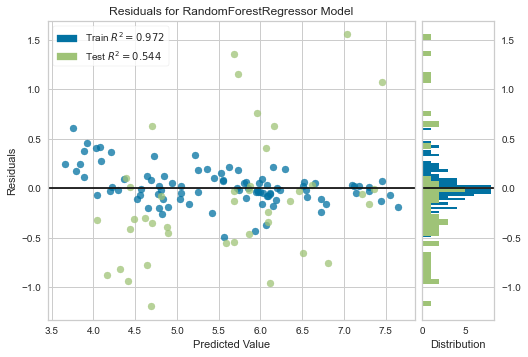

In [13]:
plot_model(rf)

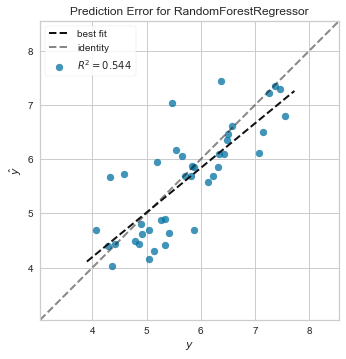

In [14]:
plot_model(rf, plot = 'error')

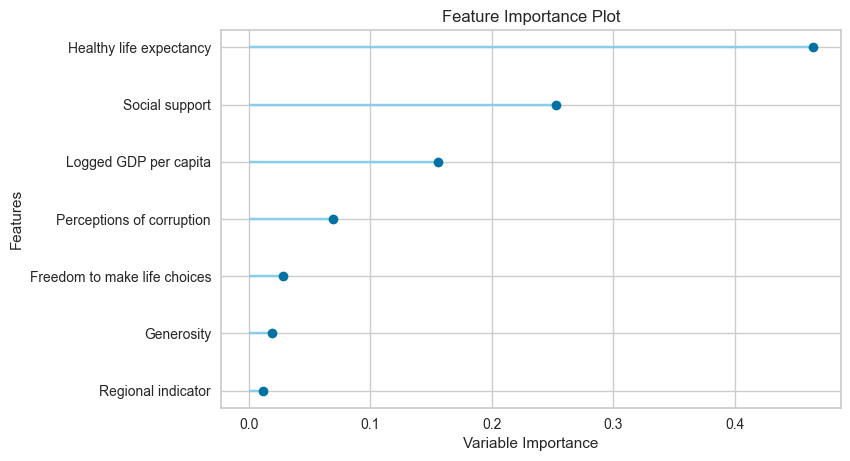

In [15]:
plot_model(rf, plot = 'feature')

In [17]:
final_rf = finalize_model(rf)

In [18]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1781,0.0471,0.2171,0.9466,0.0346,0.0331


,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,Label
0,3.0,11.000,0.836,76.820000,0.717,0.067,0.403,5.477,5.91180
1,12.0,10.867,0.934,72.699997,0.945,0.086,0.237,7.363,7.30797
2,4.0,8.541,0.779,59.301998,0.876,0.509,0.660,4.426,4.46088
3,14.0,9.966,0.925,69.099998,0.896,-0.092,0.590,6.431,6.32412
4,3.0,8.120,0.774,64.233002,0.782,0.152,0.727,5.269,5.10665
5,4.0,9.076,0.830,62.000000,0.917,-0.097,0.742,5.880,5.40771
6,4.0,9.365,0.811,62.236000,0.873,0.542,0.867,5.345,5.31936
7,12.0,10.576,0.820,73.898003,0.795,0.012,0.626,5.536,5.82032
8,9.0,10.217,0.924,70.799004,0.754,-0.118,0.939,5.882,6.02833
9,9.0,8.903,0.560,66.208000,0.774,-0.236,0.801,4.918,4.85869
